# Data PreProcessing

### *Import Libraries

In [2]:
# define dataset
import pandas as pd

#missing values define
import numpy as np

#define data vizulisation
import matplotlib.pyplot as plt
import seaborn as sns

#define model building
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### *Importing DATA

In [5]:
df = pd.read_csv('./Data/data.csv')

### *EDA

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


### *Handling Missing Values

In [13]:
# Replace "?" with np.nan
df.replace("?", np.nan, inplace=True)
df.head

<bound method NDFrame.head of      age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope   ca  \
0     28    1   2      130  132   0       2     185     0      0.0   NaN  NaN   
1     29    1   2      120  243   0       0     160     0      0.0   NaN  NaN   
2     29    1   2      140  NaN   0       0     170     0      0.0   NaN  NaN   
3     30    0   1      170  237   0       1     170     0      0.0   NaN  NaN   
4     31    0   2      100  219   0       1     150     0      0.0   NaN  NaN   
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ...  ...   
289   52    1   4      160  331   0       0      94     1      2.5   NaN  NaN   
290   54    0   3      130  294   0       1     100     1      0.0     2  NaN   
291   56    1   4      155  342   1       0     150     1      3.0     2  NaN   
292   58    0   2      180  393   0       0     110     1      1.0     2  NaN   
293   65    1   4      130  275   0       1     115     1      1.0     2  NaN  

In [15]:
df.isna().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

### *Feature Engineering

In [18]:
# Separate target column before imputing
target_column = 'num       '
y = df[target_column]
X = df.drop(columns=[target_column])

In [54]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [56]:
X_imputed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,28.0,1.0,2.0,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,1.894231,0.0,5.642857
1,29.0,1.0,2.0,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.894231,0.0,5.642857
2,29.0,1.0,2.0,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,1.894231,0.0,5.642857
3,30.0,0.0,1.0,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.894231,0.0,6.000000
4,31.0,0.0,2.0,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.894231,0.0,5.642857


In [24]:
# # Normalize/scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_imputed)
# print(X_scaled)

### *Handling Outliers

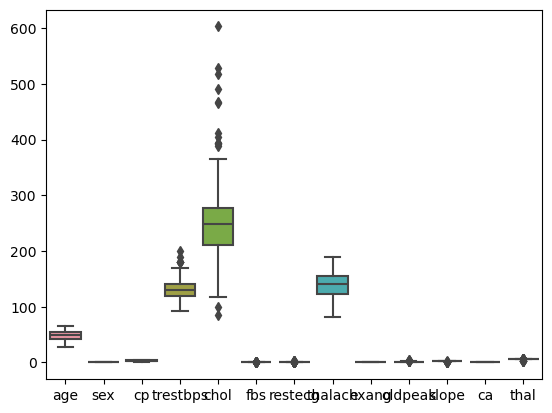

In [27]:
# Box plot
sns.boxplot(data=X_imputed)
plt.show()

In [28]:
# Handling Outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X_imputed[['age',	'sex', 'cp', 'trestbps', 'chol', 'fbs',	'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].quantile(0.25)
Q3 = X_imputed[['age',	'sex', 'cp', 'trestbps', 'chol', 'fbs',	'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((X_imputed[['age',	'sex', 'cp', 'trestbps', 'chol', 'fbs',	'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']] < lower_bound) |
            (X_imputed[['age',	'sex', 'cp', 'trestbps', 'chol', 'fbs',	'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']] > upper_bound)).any(axis=1)

# Remove outliers
df_cleaned = X_imputed[~outliers]

# Output the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)
print(df_cleaned)

Original DataFrame shape: (294, 14)
Cleaned DataFrame shape: (170, 13)
      age  sex   cp  trestbps        chol  fbs  restecg  thalach  exang  \
1    29.0  1.0  2.0     120.0  243.000000  0.0      0.0    160.0    0.0   
2    29.0  1.0  2.0     140.0  250.848708  0.0      0.0    170.0    0.0   
5    32.0  0.0  2.0     105.0  198.000000  0.0      0.0    165.0    0.0   
6    32.0  1.0  2.0     110.0  225.000000  0.0      0.0    184.0    0.0   
7    32.0  1.0  2.0     125.0  254.000000  0.0      0.0    155.0    0.0   
..    ...  ...  ...       ...         ...  ...      ...      ...    ...   
280  43.0  1.0  4.0     140.0  288.000000  0.0      0.0    135.0    1.0   
284  49.0  1.0  4.0     128.0  212.000000  0.0      0.0     96.0    1.0   
285  49.0  1.0  4.0     150.0  222.000000  0.0      0.0    122.0    0.0   
288  52.0  1.0  4.0     140.0  266.000000  0.0      0.0    134.0    1.0   
289  52.0  1.0  4.0     160.0  331.000000  0.0      0.0     94.0    1.0   

     oldpeak     slope   ca 

### *Data Vizulisation

In [30]:
df_cleaned.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

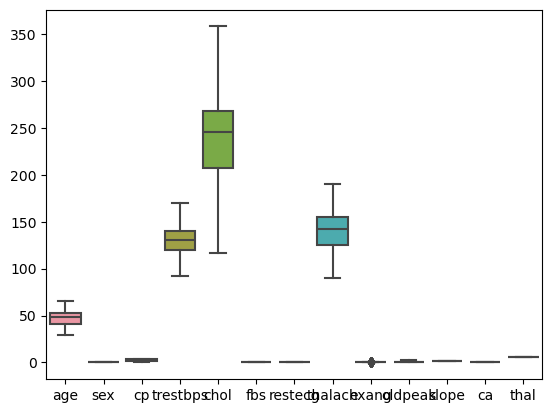

In [31]:
# Box plot
sns.boxplot(data=df_cleaned)
plt.show()

# Model building

### *Train Test Split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X_imputed,y,test_size=0.2,random_state=42)

In [35]:
x_train.shape

(235, 13)

In [52]:
x_test.shape

(59, 13)

### *Model Initialization

In [37]:
model=KNeighborsClassifier(n_neighbors=3)

### *Model Training

In [41]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### *Hyper Parameter tuning

# evaluation & Result:

In [48]:
# Predict and evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6610169491525424
Confusion Matrix:
[[30  8]
 [12  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        38
           1       0.53      0.43      0.47        21

    accuracy                           0.66        59
   macro avg       0.62      0.61      0.61        59
weighted avg       0.65      0.66      0.65        59

